# Lab 16/03

## Library nibabel

#### Open a new Terminal:
- Enter inside the folder 'Lab16_03_22'
- run `pip install -r Requirements.txt`

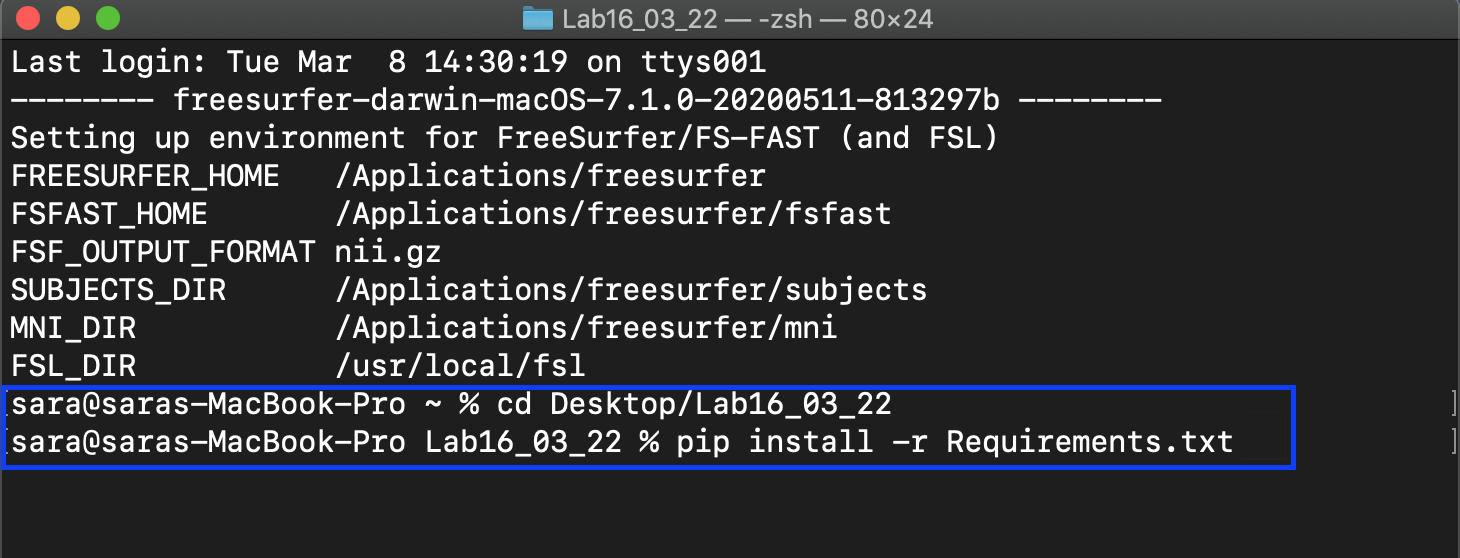

## [NiBabel](https://nipy.org/nibabel/gettingstarted.html) library:

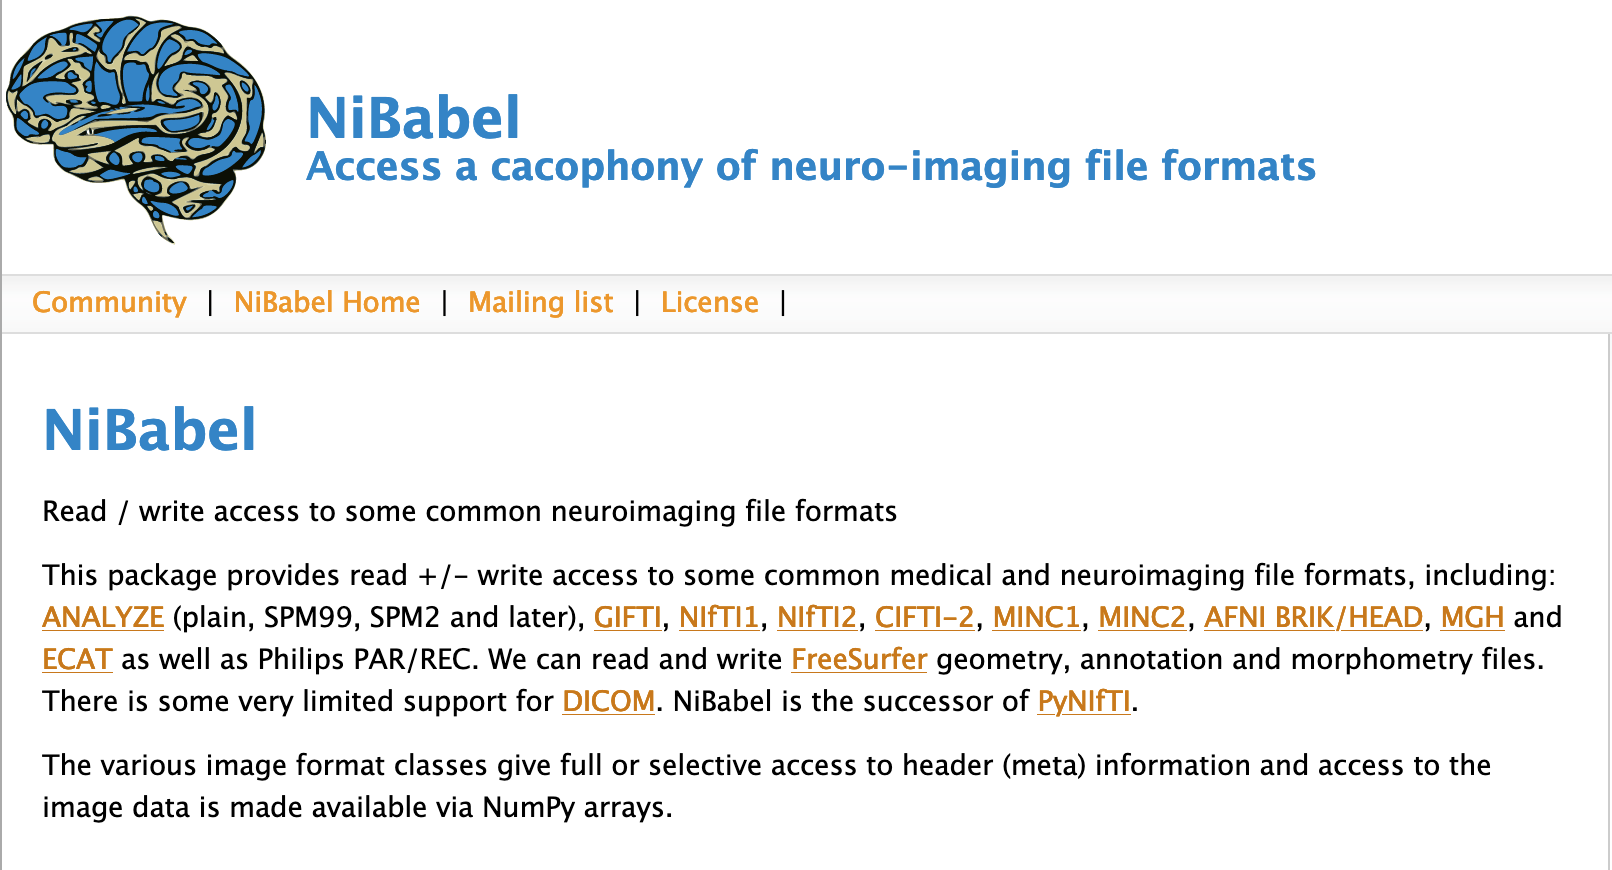

## Import the installed Library

In [1]:
import numpy as np
import os
import nibabel as nib 

## Define print functions with different colours

In [2]:
def prYellow(skk): print(f"\033[93m{skk}\033[00m") 
def prBlue(sc): print(f"\033[94m{sc}\033[00m") 
def prPink(ss): print(f"\033[95m{ss}\033[00m") 
def prGreen(sp): print(f"\033[92m{sp}\033[00m") 
def prRed(ss): print(f"\033[91m{ss}\033[00m")

## Step by step on a single subject

In [3]:
#Define the path of the subject folder
path = './female'
subj = '103818'
prBlue(f'Working on subject: {subj}')

#Define the path of the files
subj_data_path = os.path.join(path, subj)
t1_file = os.path.join(subj_data_path, 'T1_brain.nii.gz')
wm_file = os.path.join(subj_data_path, 'T1_wm_mask.nii.gz')
fa_file = os.path.join(subj_data_path, 'DTI_metrics_FA.nii.gz')

Working on subject: 103818


## Load images using nibabel

In [4]:
print('Open T1 image using nibabel')
t1_i = nib.load(t1_file)
t1 = t1_i.get_fdata()
print('Open WM image using nibabel')
wm_i = nib.load(wm_file)
wm = wm_i.get_fdata()
print('Open FA map using nibabel')
fa_i = nib.load(fa_file)
fa = fa_i.get_fdata()

Open T1 image using nibabel
Open WM image using nibabel
Open FA map using nibabel


In [5]:
print(f"Class of t1 image: {type(t1)}")
print(f"Class of wm image: {type(wm)}")
print(f"Class of fa image: {type(fa)}")

Class of t1 image: <class 'numpy.ndarray'>
Class of wm image: <class 'numpy.ndarray'>
Class of fa image: <class 'numpy.ndarray'>


## Open T1 Image using [matplotlib](https://matplotlib.org)

In [6]:
import matplotlib.pyplot as plt

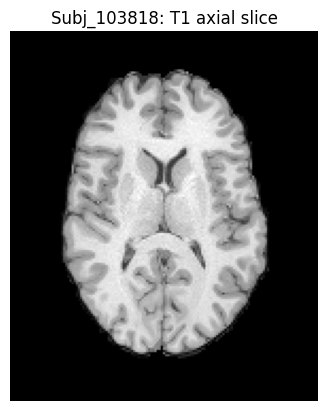

In [7]:
# Open T1 image using matplotlib

#Axial Slice

x = 65
t1_slice = t1[:, :, x]
plt.figure()
plt.imshow(np.rot90(t1_slice), cmap=plt.cm.gray)
plt.axis('off')
plt.title(f"Subj_{subj}: T1 axial slice")
plt.show()

## Open T1 Image using [mrview](https://mrtrix.readthedocs.io/en/dev/reference/commands/mrview.html)

In [10]:
{t1_file} 

{'./female/103818/T1_brain.nii.gz'}

In [11]:
!pwd

/Users/hassan/Desktop/Study/BIM/Day1/Lab/Lab01_2022


In [8]:
# Open T1 image using mrtrix
# Go to Terminal Type Following -> mrview /Users/hassan/Desktop/Study/BIM/Day1/Lab/Lab01_2022/female/103818/T1_brain.nii.gz
#!mrview {t1_file} 

zsh:1: command not found: mrview


In [12]:
# Open T1 image using mrtrix

! fsleyes {t1_file}

zsh:1: command not found: fsleyes


## Binarize T1 image

In [12]:
subj_data_path

'./female/103818'

In [17]:
prPink('Binarize the image')
t1_bin = np.where(t1>0, 1, 0)
# this is added fixed
t1_bin.dtype=np.double

prGreen('Save t1_binarized')

#save the binarized image
output_img = nib.Nifti1Image(t1_bin, t1_i.affine)
t1_bin_path = os.path.join(subj_data_path, 'T1_brain_mask.nii.gz')
nib.save(output_img, t1_bin_path) 


Binarize the image
Save t1_binarized


In [21]:
!mrview {t1_file} \
    -interpolation 0 \
    -overlay.load {t1_bin_path} \
    -overlay.opacity 0.6 \
    -overlay.interpolation 0

zsh:1: command not found: mrview


In [19]:
t1_bin_path,t1_file

'./female/103818/T1_brain_mask.nii.gz'

In [ ]:
mrview /Users/hassan/Desktop/Study/BIM/Day1/Lab/Lab01_2022/female/103818/T1_brain.nii.gz \
    -interpolation 0 \
    -overlay.load /Users/hassan/Desktop/Study/BIM/Day1/Lab/Lab01_2022/female/103818/T1_brain_mask.nii.gz \
    -overlay.opacity 0.6 \
    -overlay.interpolation 0!

## Read the header of the images

In [20]:
prGreen('Read the header')
header_t1 = t1_i.header
print(f'\033[94mHEADER T1:\033[00m\n\n{header_t1}\n\n')
header_wm = wm_i.header
print(f'\033[94mHEADER WM:\033[00m\n\n{header_wm}\n\n')
header_fa = fa_i.header
print(f'\033[94mHEADER FA:\033[00m\n\n{header_fa}\n\n')

Read the header
HEADER T1:

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 145 174 145   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    1.25  1.25  1.25  2.4   0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.3:b862cdd5'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z

## Compute the brain volume: 

- Save the size of the voxels

- Count how many voxels are present in the image

- Multiply the voxel size by the number of voxels

In [21]:
prGreen('Retrive the information regarding the voxel dimensions from the header')
dim = header_t1['pixdim']
prPink('Dim: ')
print(dim)
voxel_dim = np.prod(dim[1:4])
prPink('Voxel Dim: ')
print(voxel_dim)

Retrive the information regarding the voxel dimensions from the header
Dim: 
[-1.    1.25  1.25  1.25  2.4   0.    0.    0.  ]
Voxel Dim: 
1.953125


In [22]:
prGreen('Count non zero voxels')
nozero = np.count_nonzero(t1_bin)
prPink('No zero Voxels: ')
print(nozero)

Count non zero voxels
No zero Voxels: 
708909


In [23]:
prGreen('Compute the brain volume')
volume_mm3 = voxel_dim * nozero
print(f'\033[94mBrain volume of subject {subj} is:\033[00m {volume_mm3:.1f} mm^3')

volume_cm3 = volume_mm3/1000
print(f'\033[94mBrain volume of subject {subj} is:\033[00m {volume_cm3:.1f} cm^3')

Compute the brain volume
Brain volume of subject 103818 is: 1384587.9 mm^3
Brain volume of subject 103818 is: 1384.6 cm^3


### [Brain size](https://en.wikipedia.org/wiki/Brain_size) info

## Compute the average FA value in the white matter

In [24]:
fa_file

'./female/103818/DTI_metrics_FA.nii.gz'

In [ ]:
mrview /Users/hassan/Desktop/Study/BIM/Day1/Lab/Lab01_2022/female/103818/DTI_metrics_FA.nii.gz

In [26]:
!mrview {fa_file}

zsh:1: command not found: mrview


In [27]:
prGreen('Compute the average FA value inside the WM')
mean_wm_fa = np.mean(fa[wm > 0])
prPink('Mean FA value: ')
print(mean_wm_fa)

Compute the average FA value inside the WM
Mean FA value: 
0.3947532851760275


# Repeat the same on a list of subjects and save volume and mean FA in a .csv file

### Create a dataframe using [pandas](https://pandas.pydata.org)

In [26]:
import pandas as pd

## Define a for function to perform operations on all subjects

In [27]:
group = ['male', 'female']
data = []
for g in group:
    path = f'./{g}'
    Subj_list = [f for f in os.listdir(path) if not f.startswith('.')]
    Subj_list.sort()
    print(f'\033[95mSubj_list {g}:\033[00m {Subj_list}')
    for i, subj in enumerate(Subj_list):
        i+=1
        prBlue(f'Working on subject: {subj}')
        subj_data_path = os.path.join(path, subj)
        t1_file = os.path.join(subj_data_path, 'T1_brain.nii.gz')
        wm_file = os.path.join(subj_data_path, 'T1_wm_mask.nii.gz')
        fa_file = os.path.join(subj_data_path, 'DTI_metrics_FA.nii.gz')
        
        #Load the images as numpy arrays
        t1_i = nib.load(t1_file)
        t1 = t1_i.get_fdata()
        wm_i = nib.load(wm_file)
        wm = wm_i.get_fdata()
        fa_i = nib.load(fa_file)
        fa = fa_i.get_fdata()
        
        #Binarize T1 image
        t1_bin = np.where(t1>0, 1, 0)
        # this is added
        t1_bin.dtype=np.int32
        output_img = nib.Nifti1Image(t1_bin, t1_i.affine)
        output_path = os.path.join(subj_data_path, 'T1_brain_mask.nii.gz')
        nib.save(output_img, output_path) 
        
        #Read the header of the images
        header_t1 = t1_i.header
        header_wm = wm_i.header
        header_fa = fa_i.header
        
        #Retrive the information regarding the voxel dimensions from the header
        dim = header_t1['pixdim']
        voxel_dim = np.prod(dim[1:4])
        
        #Calculate the number of voxels in brain 
        nozero = np.count_nonzero(t1_bin)
        volume_mm3 = voxel_dim * nozero
        volume = volume_mm3/1000
        
        #Using nibabel to calculate the mean of the FA value 
        mean_wm_fa = np.mean(fa[wm > 0])
        
        #Define a categorical variable for the Gender
        if g == 'male':
            gender = 1
        if g == 'female':
            gender = 2
            
        # initialize list of lists
        data.append({
            'Subject': subj,
            'Volume': volume, 
            'meanFA': mean_wm_fa,
            'Gender': gender
        })
        
prGreen('\nSaving .csv file\n')
df = pd.DataFrame(data)
df.to_csv('Statistics.csv', index = False)

Subj_list male: ['122317', '139839', '146129', '149337', '149741', '151526', '185442', '341834', '433839', '599671']
Working on subject: 122317


ValueError: To change to a dtype of a different size, the last axis must be contiguous

## Data Analysis

### Load of the data and check

In [28]:
#Load the file.csv using pandas
dataframe = os.path.join('Statistics.csv')
data = pd.read_csv(dataframe)    

In [29]:
#Visualize the header of the data frame 
prGreen("Header of the dataframe")
print(data.head())

Header of the dataframe
   Subject       Volume    meanFA  Gender
0   122317  1610.046875  0.409657       1
1   139839  1769.355469  0.400061       1
2   146129  1611.173828  0.396956       1
3   149337  1555.662109  0.385675       1
4   149741  1611.562500  0.376525       1


### Descriptive analysis

In [30]:
prGreen("Summary of the Volume grouped by Gender")
print (data.groupby('Gender')['Volume'].describe())

Summary of the Volume grouped by Gender
        count         mean         std          min          25%          50%  \
Gender                                                                          
1        10.0  1652.499023  107.531372  1498.414062  1587.611328  1611.368164   
2        10.0  1361.707422   97.812474  1240.339844  1319.963379  1336.350586   

                75%          max  
Gender                            
1       1747.583008  1820.050781  
2       1377.095703  1545.626953  


## Violin Plot using [seaborn](https://seaborn.pydata.org)

### Violin plot Sex-Driven Differences in Brain Volume

In [32]:
import seaborn as sns

In [33]:
#Set the palette for the violinplot
#sns.set_theme(style="ticks", palette="bright")

sns.set(style="ticks", palette="bright")

Sex-Driven Differences in Brain Volume


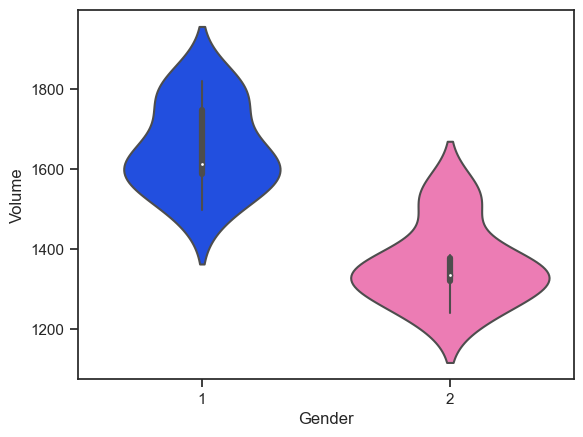

In [34]:
#Show the violinplot using seaborn
prBlue('Sex-Driven Differences in Brain Volume')
plt.figure('Gender differences in brain volume')
sns.violinplot(x="Gender", y="Volume", palette=["b", "hotpink"], data=data)
plt.show()

### Violin plot Sex-Driven Differences in Fa mean value

Sex-Driven Differences in FA mean value


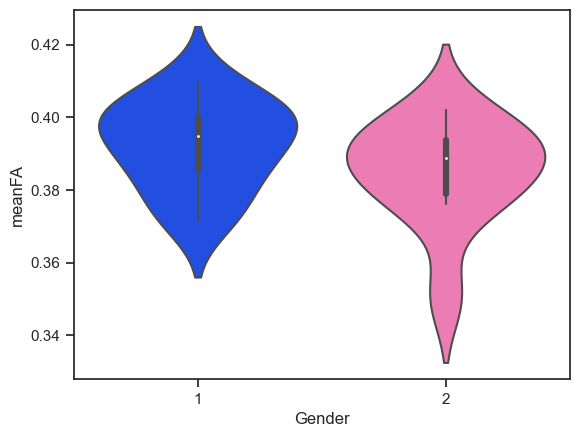

In [35]:
#Show the violinplot using seaborn
prBlue('Sex-Driven Differences in FA mean value')
plt.figure('Gender differences in FA mean value')
sns.violinplot(x="Gender", y="meanFA", palette=["b", "hotpink"], data=data)
plt.show()

## Exercises 

1) Binarize FA map 

2) Put to zero those voxel inside the WM having FA < 0.2 

3) Put to zero the voxel corresponding to the regions outside the WM (hint: use the WM mask)

4) Perform descriptive analysis of mean FA grouped by Gender